# 기초통계1

# Data Visualization

- 데이터 품질 및 분포 특성을 시각적으로 확인하기 위해 사용
- 데이터 이해 및 분석 결과를 설득력 있게 표현하기 위해 사용

* 모집단 : 분석에 대상이 되는 전체.
* 표본집단 : 모집단에서 추출된 모집단의 부분집합. 모집단의 특성을 추정하기 위해서 통계적인 기법을 사용한다.

## 1. iris 데이터

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 실수형태는 float64, string형태는 object로 들어가 있다.

In [14]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [17]:
iris[iris['species'] == 'setosa'][['petal_length']].head()

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [18]:
setosa_petal_length = iris[iris['species'] == 'setosa'][['petal_length']]

* 종은 setosa의 petal_length를 가져왔다.

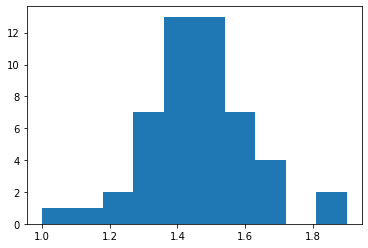

In [19]:
import matplotlib.pyplot as plt
plt.hist(setosa_petal_length)
plt.show()

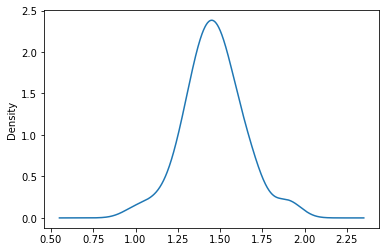

In [20]:
iris[iris['species']=='setosa']['petal_length'].plot.density()
plt.show()

* 파이썬의 기본적인 density그래프를 그려주었다.
* 커널함수는 가우시안 연산을 사용해서 그려진 것을 볼 수 있다.

* 커널 밀도 추정은 커널 함수를 이용한 밀도 추정 방법 중 하나 
* 밀도 추정이란 추출된 데이터들을 이용해서 밀도함수를 구하는 것

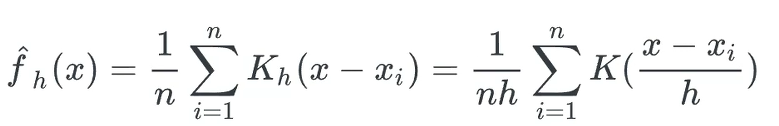

<center> <커널함수> </center>
    
커널 함수에 대한 위키페디아 링크: https://en.wikipedia.org/wiki/Kernel_density_estimation

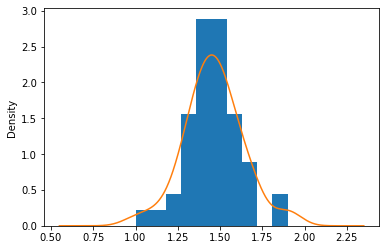

In [24]:
ax = iris[iris['species'] == 'setosa']['petal_length'].plot.hist(density = True)
iris[iris['species'] == 'setosa']['petal_length'].plot.density(ax = ax)
plt.show()

* 히스토그램과 밀도함수가 동시에 그려지는 것을 볼 수 있다.

## 2. 기초 통계 이론

### 2.1 왜도와 첨도

**왜도(Skewness)**
* 데이터의 분포에 따라서 오른쪽으로 치우쳤는지, 왼쪽으로 치우졌는지글 확인할 수 있다.
* Negative Skewness : 데이터의 중심이 오른쪽으로 치우쳐져 있을 때.
* Positive Skewness : 데이터의 중심이 왼쪽으로 치우쳐져 있을 때.

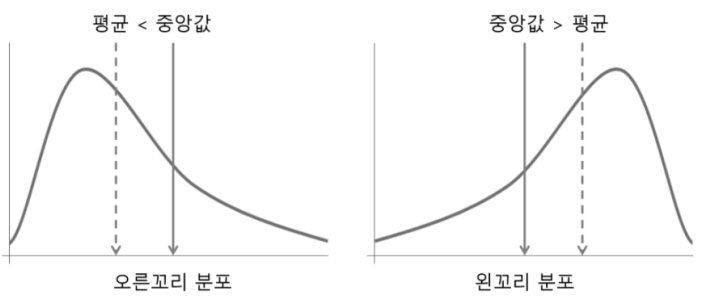

**첨도(Kurtosis)**
* 데이터가 얼마나 평균에 모여있는지를 나타낸다.
* Leptokurtic(고첨): 정규 분포 중앙에 많이 몰려 있어서 뾰족하다.
* Mesokutic(중첨): 정규본포와 유사하다.
* Pltykutic(저첨): 정규 분포보다 완만한다.

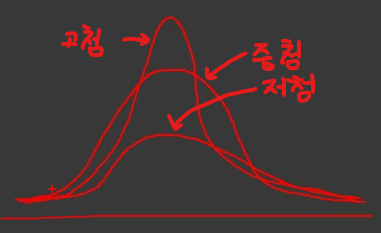

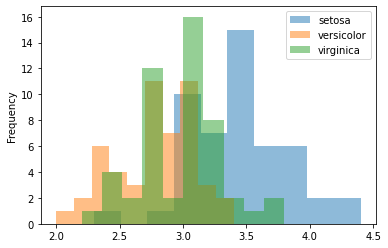

In [28]:
fig, ax = plt.subplots(1, 1)

for species in iris['species'].unique():
    width_series = iris[iris['species'] == species]['sepal_width']
    width_series.plot.hist(alpha = 0.5, ax = ax, label = species)
plt.legend()
plt.show()

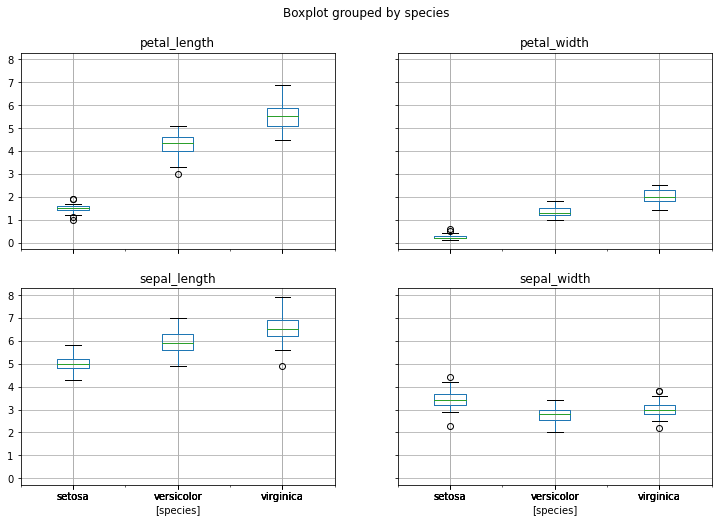

In [29]:
# Box Plot
iris.boxplot(by='species', layout=(2,2), figsize=(12,8))
plt.show()

* 판다스 안에서 기본적으로 Box Plot을 그릴 수 있다고 말씀하심.

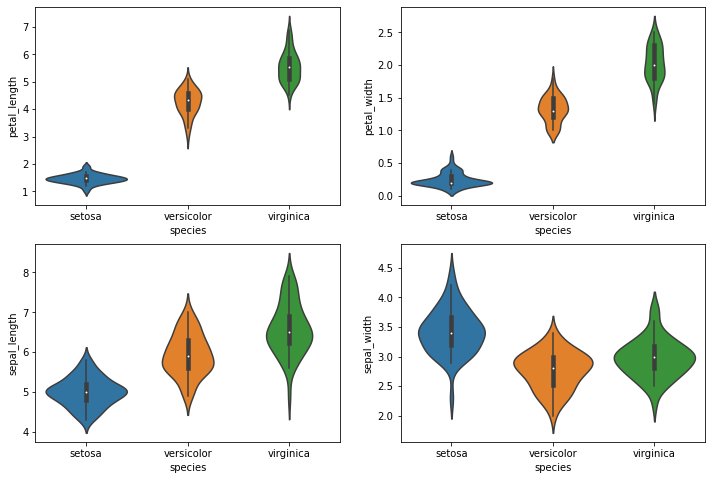

In [34]:
# Violin Plot
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['petal_length','petal_width','sepal_length','sepal_width']):
  sns.violinplot(data=iris, x='species', y = col, ax = ax[i//2][i%2])

plt.show()    

### 2.2 데이터의 중심

**데이터의 중심**

**최빈값(mode):** 

   * 빈도가 가장 많이 나오는 값.
   * 범주형 데이터의 대표값.
   * 2개 이상 존재
   * 극단적인 값의 영향을 덜 받게 된다.

**중앙값**

   * 데이터를 내림차순 해서 가장 중간에 있는 데이터    
   * 짝수개 일 경우는 중앙에 있는 데이터 두개를 더하고 나눈 값이 중앙값.

**산술평균**

   * 일반적으로 사용하는 평균
   * 극단값 이상치에 영향을 많이 받는 통계량
   * 데이터의 개수로 나눔
   * 절삭평균(앞 뒤로 일정 데이터를 벗어나는 경우를 제외하고 평균을 구한다.)으로 극단값에 대해 보정
    
**가중평균**

   * 일반적인 산술 평균 각각의 데이터마다 중요도에 따라서 가중치 설정
   * 가중치를 다 더한 값으로 나눠줌
    
**기하평균**

   * 성장률이나 증가율 이런 비율에 대한 데이터를 평균 낼 때 사용
   * 음수나 0의 데이터가 있는 경우에는 적용을 못합니다.

**편차**
 * 데이터 값과 평균을 빼준 값

**분산**
 * 편차의 제곱의 합을 데이터 수로 나눈 값
 * 편차를 다 더하면 0이 나오기 때문에 제곱을 진행
 * 편차가 큰 데이터 값에 대해 영향정도를 키우기 위해서 
 
**표준편차**
 * 분산의 제곱근을 한 값

<center> 단어 용어 </center>

**모집단**
 * 조사 대상이 되는 모든집단

**표본(Sampling)집단**
 * 모집단의 부분집합
 
**모수**
 * 모집단의 어떤 값
 
**통계량**
 * 표본 집단의 정보

In [37]:
import numpy as np
data = np.arange(10, 20, 0.1) # 0.1을 기준으로 100개의 값을 가져온다.

### 2.2.1 평균

In [38]:
# 합을 구해서 평균을 내주는 방법.
sum_ = 0
for i in data:
    sum_ += i
sum_/len(data)

14.949999999999978

In [39]:
# mean을 사용해서 평균을 구해주는 방법.
data.mean()

14.949999999999982

### 2.2.2 절삭 평균

In [31]:
# 절삭 평균
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1) # 절삭평균
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 3.7
절삭평균 = 3.25
중앙값 = 3.0



### 2.2.3 중앙값

In [36]:
# 중앙값
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 99999999999])
data_length = len(data)

if data_length % 2 == 0:
    idx = data_length // 2
    median = data[idx] + data[idx + 1]/2

else:
    idx = data_length//2
    median = data[idx]
print('중앙값', median)

중앙값 3


### 2.2.4 가중 평균

In [41]:
# 가중평균(해당 변수에 가중치를 주어서 가중평균을 구해준다.)
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
weights = np.array([0.1, 0.05, 0.3, 0.05, 0.15, 0.025, 0.025, 0.05, 0.125, 0.175])

sum_ = 0
for idx in range(len(data)):
    sum_ += weights[idx] * data[idx]
print(sum_ / sum(weights))

53.80952380952381


### 2.2.5 최빈값

In [45]:
# 최빈값
data = np.array([1, 1, 2, 2, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 8, 9, 10])
count_dict = dict()
for d in data:
    if d not in count_dict:
        count_dict[d] = 1
    else:
        count_dict[d] += 1

sorted(count_dict.items(), key = lambda x: x[1], reverse = True)[0][0]

7

### 2.2.6 편차, 표준편차, 분산

In [57]:
# 편차, 표준편차, 분산
norm = np.random.normal(10.0, 2.0, 100)

# 평균
norm_mean = norm.mean()

In [58]:
# 편차
norm_dev = [i - norm_mean for i in norm]

In [59]:
# 분산
norm_var = sum([i**2 for i in norm_dev])/(len(norm) - 1)
# 표본에서 분산을 구할 때는 전체 n에서 1을 빼게 되면, 분산을 잘 구해 준다고 볼 수 있다.

In [60]:
# 표준편차
import math 
math.sqrt(norm_var)
# np.std(norm) # 넘파이 내 표준편차 구하는 메서드

1.851394147943619

### 2.2.7 기하 평균

In [62]:
# 기하평균
score_rate = [1.1, 2.1, 0.91, 0.14, 0.51]
mul_ = 1
for rate in score_rate:
    mul_ *= rate

geometric_mean = mul_**(1/len(score_rate))

In [63]:
geometric_mean

0.6843374651564551

## 3. 실습

In [64]:
import seaborn as sns
dataset = sns.get_dataset_names()

In [68]:
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 3.1 행성 데이터

In [70]:
planets = sns.load_dataset('planets')

In [72]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [81]:
planets[planets['distance'].isnull()].head()

,method,number,orbital_period,mass,distance,year
32,Eclipse Timing Variations,1,10220.0,6.05,NaN,2009
33,Imaging,1,NaN,NaN,NaN,2008
41,Eclipse Timing Variations,1,2900.0,NaN,NaN,2011
42,Eclipse Timing Variations,1,4343.5,4.20,NaN,2012
43,Eclipse Timing Variations,2,5840.0,NaN,NaN,2011


In [ ]:
fig, ax = plt.subplots(1, 1)

for method_ in planets['method'].unique():
    width_series = iris[iris['species'] == species]['sepal_width']
    width_series.plot.hist(alpha = 0.5, ax = ax, label = species)
plt.legend()
plt.show()

### 3.2 펭귄 데이터

In [95]:
# 펭귄에 대한 데이터
penguins = sns.load_dataset('penguins')

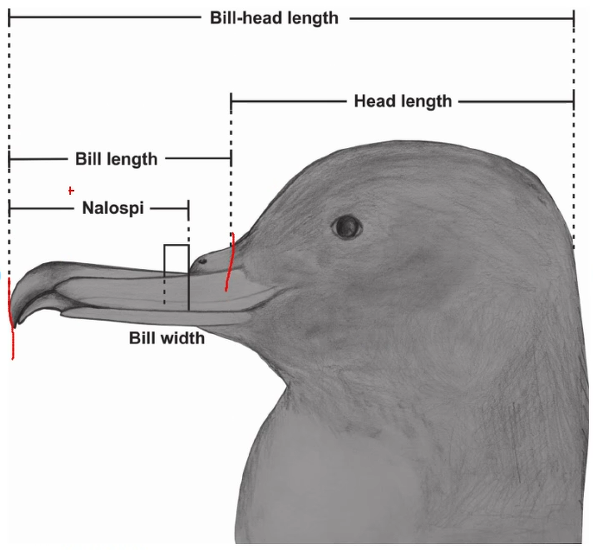

In [96]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


* bill_depth_mm: 주둥이 길이
* bill_length_mm: 주둥이 폭
* flipper_length_mm: 날개
* body_mass_g: 몸무게

In [97]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [98]:
penguins[penguins['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [100]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [108]:
bill_length_mm = penguins[penguins['bill_length_mm'].isnull() == False]
bill_depth_mm = penguins[penguins['bill_depth_mm'].isnull() == False]
flipper_length_mm = penguins[penguins['flipper_length_mm'].isnull() == False]
body_mass_g = penguins[penguins['body_mass_g'].isnull() == False]
notnull_punguins = penguins[penguins['sex'].isnull() == False]

In [104]:
bill_length_mm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


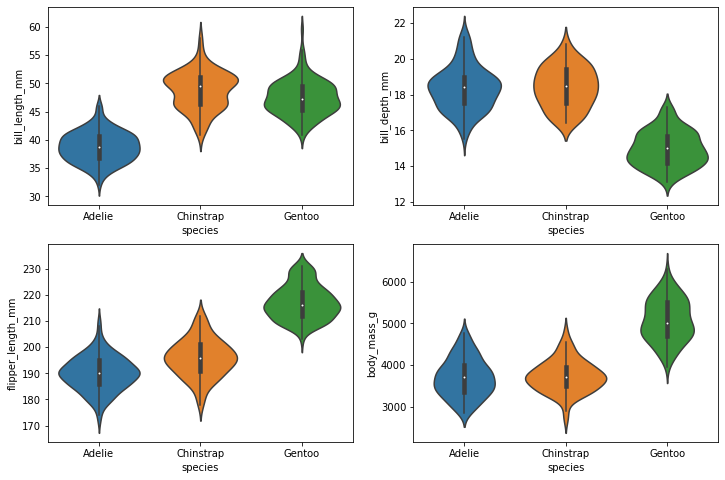

In [106]:
# Violin plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=bill_length_mm, x='species', y=col, ax=ax[i//2][i%2])

plt.show()     

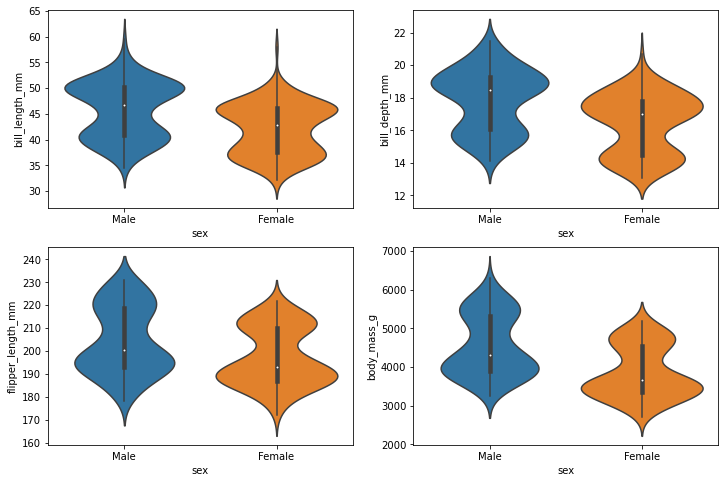

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=notnull_punguins, x='sex', y=col, ax=ax[i//2][i%2])

plt.show()  

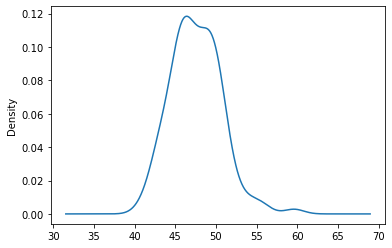

In [111]:
notnull_punguins[notnull_punguins['species'] == 'Gentoo']['bill_length_mm'].plot.density()
plt.show()

# END